# __Training of a Neural Network for a classification toy problem.__

#### We import standard libraries and the three classes of the tool box ToyNN (ToyPb, nD_data, ToyNN)

__Look at the companion note or to the dedicated notebook for the description of the classes.__

In [63]:
import numpy as np
from numpy import random as nprd
from matplotlib import pyplot as plt
#from matplotlib import cm as cm
from toyneuralnetwork import *
import random as rd

### We  start by choosing a problem ###

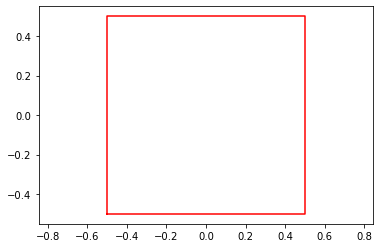

In [64]:
pb = ToyPb(name = "square", bounds = (-1,1))
pb.show_border()

### Next we pick a set of training data and a set of test data that fit the problem. 

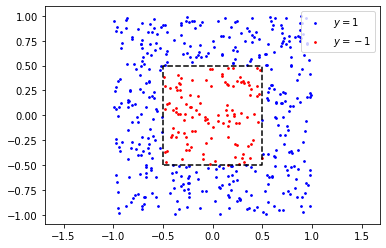

In [65]:
ndata = 1000
DATA = nD_data(n = ndata, pb = pb)

ntest = 500
TEST = nD_data(n = ntest, pb = pb, init_pred='yes')

TEST.show_class()
pb.show_border('k--')
plt.legend(loc=1)
plt.show()

### We  choose the number layers and the number of nodes by layer for the neural network (with the constaints of   two input nodes and one output node).

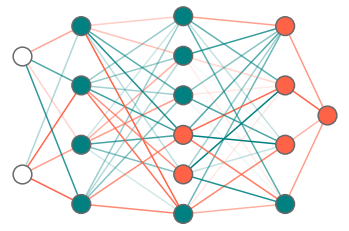

In [66]:
CardNodes = (2, 4, 6, 4, 1)
NN = ToyNN(card = CardNodes, coef_bounds=(-1,1,-1,1), chi="tanh", grid=(-1,1,41))
NN.show()

## ___Full Batch Method___

__We optmize the coefficents of the neural network (stored in__ NN.W __and__ NN.Bias __) in order to impove its predictions. In practice, we optimize__
$$
\dfrac1n\sum_{\text{i}=0}^{n-1}\ell\left(  y_i \widehat f(X_i)    \right),
$$
__where__ $n=\text{DATA.n}$, $\,\ell=\text{pb.loss}$, $y_i=\text{DATA.Y[i]}$,  $X_i=\text{DATA.X[i]}$ __and where the funcion $\widehat f(X)=\text{NN.output}(X)$.__

__We first implement the full gradient method with fixed step.__

### _Parameters for the Full Gradient and initialization_

Epoch: 0, Cost: 1.5050559588004935


[]

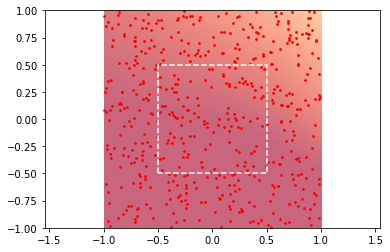

In [67]:
to = 1        # fixed step size of the gradient descent algorithm
Nepoch = 200    # Number of epochs 

plot_period = 20

NN = ToyNN(card = CardNodes, coef_bounds=(-1,1,-1,1), chi="tanh", grid=(-1,1,41))

cost  = NN.total_loss_and_prediction(pb=pb, DATA=TEST)
title = "Epoch: " + str(0) + ", Cost: " + str(cost)
print(title)
NN.show_pred()
TEST.show_class(pred="ok")
pb.show_border('w--')
plt.plot()

### _Full gradient Iterations_

Epoch: 1, Cost: 3.0882919233503725
Epoch: 2, Cost: 1.4091984633350034
Epoch: 3, Cost: 0.3040367186019601
Epoch: 4, Cost: 0.9262273278673934
Epoch: 5, Cost: 1.0576995195548444
Epoch: 6, Cost: 3.052472490101279
Epoch: 7, Cost: 1.6867607135411122
Epoch: 8, Cost: 0.5693159600628755
Epoch: 9, Cost: 0.5813477654341979
Epoch: 10, Cost: 1.2812481210343858
Epoch: 11, Cost: 0.41394126580017215
Epoch: 12, Cost: 1.145396786603673
Epoch: 13, Cost: 1.4379436749920187
Epoch: 14, Cost: 0.32570966022146053
Epoch: 15, Cost: 1.5232256831999587
Epoch: 16, Cost: 2.6018255110190256
Epoch: 17, Cost: 1.6167198010590824
Epoch: 18, Cost: 0.8178246374244583
Epoch: 19, Cost: 0.40135126925267506
Epoch: 20, Cost: 1.3498164072814038


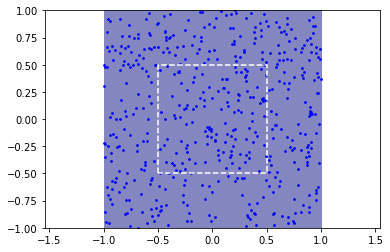

Epoch: 21, Cost: 0.5319119952267296
Epoch: 22, Cost: 1.062660393571324
Epoch: 23, Cost: 1.7067990945282685
Epoch: 24, Cost: 0.7450957209175209
Epoch: 25, Cost: 1.1072269790510803
Epoch: 26, Cost: 1.406840641158886
Epoch: 27, Cost: 0.6604336676575442
Epoch: 28, Cost: 0.7465377668609648
Epoch: 29, Cost: 1.6604554674707952
Epoch: 30, Cost: 1.2150764848203437
Epoch: 31, Cost: 0.8992151967037045
Epoch: 32, Cost: 0.5824158070863525
Epoch: 33, Cost: 0.33990832304187346
Epoch: 34, Cost: 0.5989389944853128
Epoch: 35, Cost: 0.5452671029026701
Epoch: 36, Cost: 0.8837268083704221
Epoch: 37, Cost: 0.36369316268921253
Epoch: 38, Cost: 0.47751662974055165
Epoch: 39, Cost: 0.7624673207109753
Epoch: 40, Cost: 0.2773757128600053


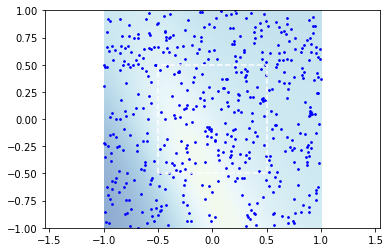

Epoch: 41, Cost: 0.583449265114731
Epoch: 42, Cost: 0.9925136817253066
Epoch: 43, Cost: 0.3481788171387354
Epoch: 44, Cost: 0.5503821529327189
Epoch: 45, Cost: 1.164521554234287
Epoch: 46, Cost: 0.5032832137948662
Epoch: 47, Cost: 0.48391432368284304
Epoch: 48, Cost: 0.9558304856922928
Epoch: 49, Cost: 0.41392272535102764
Epoch: 50, Cost: 0.3840057381135102
Epoch: 51, Cost: 0.6541802225739294
Epoch: 52, Cost: 0.3116072992710464
Epoch: 53, Cost: 0.34713523772634325
Epoch: 54, Cost: 0.6394593923581962
Epoch: 55, Cost: 0.31200987880359654
Epoch: 56, Cost: 0.3165042748962254
Epoch: 57, Cost: 0.46797583023149664
Epoch: 58, Cost: 0.25232316173276764
Epoch: 59, Cost: 0.2539662256063454
Epoch: 60, Cost: 0.2526838911986323


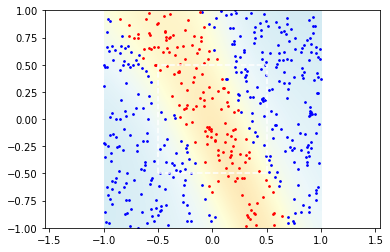

Epoch: 61, Cost: 0.3128826025247045
Epoch: 62, Cost: 0.2976051501154271
Epoch: 63, Cost: 0.48632588768993273
Epoch: 64, Cost: 0.25283211391163013
Epoch: 65, Cost: 0.24617433507831382
Epoch: 66, Cost: 0.2799694887654908
Epoch: 67, Cost: 0.2797742352016974
Epoch: 68, Cost: 0.42139873188031196
Epoch: 69, Cost: 0.239929473331934
Epoch: 70, Cost: 0.2576563843669529
Epoch: 71, Cost: 0.2589669833803103
Epoch: 72, Cost: 0.3800647332228105
Epoch: 73, Cost: 0.24685390127027584
Epoch: 74, Cost: 0.33033315986032336
Epoch: 75, Cost: 0.26851692320070014
Epoch: 76, Cost: 0.41328395186402345
Epoch: 77, Cost: 0.23358444775217363
Epoch: 78, Cost: 0.25879873777662016
Epoch: 79, Cost: 0.2581296572267962
Epoch: 80, Cost: 0.3925345042340111


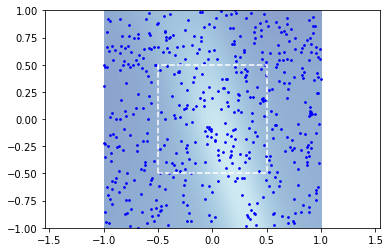

Epoch: 81, Cost: 0.2346690244539545
Epoch: 82, Cost: 0.29414463405599833
Epoch: 83, Cost: 0.2715897563336015
Epoch: 84, Cost: 0.4413001907776053
Epoch: 85, Cost: 0.2245399783480756
Epoch: 86, Cost: 0.22692964937179458
Epoch: 87, Cost: 0.21916862751697885
Epoch: 88, Cost: 0.25586583805642016
Epoch: 89, Cost: 0.26318230882765364
Epoch: 90, Cost: 0.45951412774649136
Epoch: 91, Cost: 0.2153393248439463
Epoch: 92, Cost: 0.21354957087534038
Epoch: 93, Cost: 0.2055882366578141
Epoch: 94, Cost: 0.22393228128813056
Epoch: 95, Cost: 0.23325126955062184
Epoch: 96, Cost: 0.4100369357472031
Epoch: 97, Cost: 0.21736935806755608
Epoch: 98, Cost: 0.3090381996128673
Epoch: 99, Cost: 0.2669303341881511
Epoch: 100, Cost: 0.49474581626035674


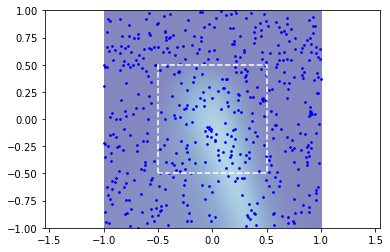

Epoch: 101, Cost: 0.20775941177601792
Epoch: 102, Cost: 0.19615474671649158
Epoch: 103, Cost: 0.20292610318156923
Epoch: 104, Cost: 0.19866931303553564
Epoch: 105, Cost: 0.27369647678128917
Epoch: 106, Cost: 0.27464945812332636
Epoch: 107, Cost: 0.5569591956869734
Epoch: 108, Cost: 0.22031674640667726
Epoch: 109, Cost: 0.20055711700236428
Epoch: 110, Cost: 0.24068492089091728
Epoch: 111, Cost: 0.22486272730370116
Epoch: 112, Cost: 0.38002435933393663
Epoch: 113, Cost: 0.19968007649453795
Epoch: 114, Cost: 0.27134477950666996
Epoch: 115, Cost: 0.2252483298707705
Epoch: 116, Cost: 0.3938602665140577
Epoch: 117, Cost: 0.18445830385741768
Epoch: 118, Cost: 0.22002406086327034
Epoch: 119, Cost: 0.2039525509674504
Epoch: 120, Cost: 0.33553097655946185


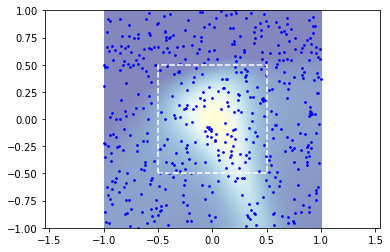

Epoch: 121, Cost: 0.20118395157103341
Epoch: 122, Cost: 0.31330262654366453
Epoch: 123, Cost: 0.1976921255339472
Epoch: 124, Cost: 0.3025501701293103
Epoch: 125, Cost: 0.19348164638478488
Epoch: 126, Cost: 0.29066567266874554
Epoch: 127, Cost: 0.19094775226730418
Epoch: 128, Cost: 0.2866508510542725
Epoch: 129, Cost: 0.18755847205165732
Epoch: 130, Cost: 0.27891657322158814
Epoch: 131, Cost: 0.18522042537308417
Epoch: 132, Cost: 0.27505585318749237
Epoch: 133, Cost: 0.18249326034895288
Epoch: 134, Cost: 0.2690804189520468
Epoch: 135, Cost: 0.18033206584849176
Epoch: 136, Cost: 0.26477282784062905
Epoch: 137, Cost: 0.17806893293558065
Epoch: 138, Cost: 0.2596963591454016
Epoch: 139, Cost: 0.17606974103151135
Epoch: 140, Cost: 0.25536177969933016


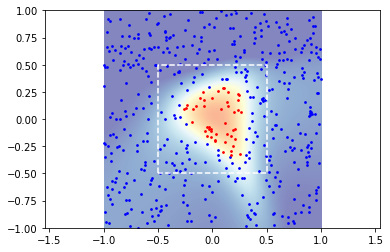

Epoch: 141, Cost: 0.17410446040921704
Epoch: 142, Cost: 0.25103601232827977
Epoch: 143, Cost: 0.17226801888596763
Epoch: 144, Cost: 0.24713859707007185
Epoch: 145, Cost: 0.17050208082732687
Epoch: 146, Cost: 0.24349777697792582
Epoch: 147, Cost: 0.16881682261668443
Epoch: 148, Cost: 0.24016327861983608
Epoch: 149, Cost: 0.16719832368320223
Epoch: 150, Cost: 0.23708222020851955
Epoch: 151, Cost: 0.16564317081460747
Epoch: 152, Cost: 0.234232036533223
Epoch: 153, Cost: 0.16414667056895135
Epoch: 154, Cost: 0.23158282005686678
Epoch: 155, Cost: 0.16270578996045237
Epoch: 156, Cost: 0.22911106119924776
Epoch: 157, Cost: 0.16131775519564376
Epoch: 158, Cost: 0.22679586070859292
Epoch: 159, Cost: 0.15997999352716516
Epoch: 160, Cost: 0.22461916868769913


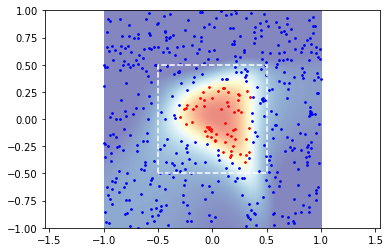

Epoch: 161, Cost: 0.1586899593648478
Epoch: 162, Cost: 0.22256507150208907
Epoch: 163, Cost: 0.15744515071008777
Epoch: 164, Cost: 0.22061956384471412
Epoch: 165, Cost: 0.15624315676210962
Epoch: 166, Cost: 0.21877037209950323
Epoch: 167, Cost: 0.15508170853268125
Epoch: 168, Cost: 0.21700680039989534
Epoch: 169, Cost: 0.15395870746689366
Epoch: 170, Cost: 0.21531953557384156
Epoch: 171, Cost: 0.15287223118438079
Epoch: 172, Cost: 0.2137004205962841
Epoch: 173, Cost: 0.15182052146886055
Epoch: 174, Cost: 0.21214222645065337
Epoch: 175, Cost: 0.15080196027804074
Epoch: 176, Cost: 0.21063845369004075
Epoch: 177, Cost: 0.14981503783760516
Epoch: 178, Cost: 0.20918318192649632
Epoch: 179, Cost: 0.1488583160446658
Epoch: 180, Cost: 0.20777097004388376


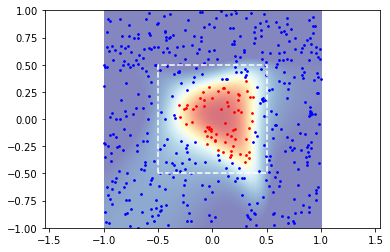

Epoch: 181, Cost: 0.14793039085021725
Epoch: 182, Cost: 0.2063967984324809
Epoch: 183, Cost: 0.14702985811217734
Epoch: 184, Cost: 0.205056039464719
Epoch: 185, Cost: 0.14615528747727685
Epoch: 186, Cost: 0.20374444315316984
Epoch: 187, Cost: 0.1453052076737139
Epoch: 188, Cost: 0.20245812923645512
Epoch: 189, Cost: 0.1444781045053752
Epoch: 190, Cost: 0.2011935821405595
Epoch: 191, Cost: 0.14367243060508225
Epoch: 192, Cost: 0.19994764907264836
Epoch: 193, Cost: 0.14288662432450186
Epoch: 194, Cost: 0.19871754267180958
Epoch: 195, Cost: 0.1421191343214979
Epoch: 196, Cost: 0.1975008482796487
Epoch: 197, Cost: 0.14136844637966595
Epoch: 198, Cost: 0.1962955332825989
Epoch: 199, Cost: 0.14063310949351557
Epoch: 200, Cost: 0.19509995383325152


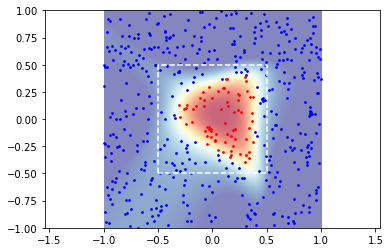

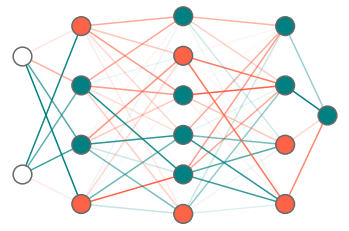

In [44]:
ep = []
c = []
### Iterations (no sub_iterations)
for epoch in range(1, Nepoch + 1):
    ## Computation of the descent direction
    # 0-initialization of the descent vectors
    NN.init_vector()
    # computation and summation over the data of their contributions to the total descent   
    for j in range(ndata):
        Desc_W, Desc_Bias = NN.descent(X=DATA.X[j], y=DATA.Y[j], pb=pb, tau=to)
        NN.add_to_vector(Desc_W, Desc_Bias)
    NN.mult_vector(1/ndata)       # renormalization of the sum of descent vectors      
        # Update of the parameters
    NN.add_vector_to_coefs()


#computation of the error (sum of test losses)
    if epoch%plot_period==0:
        cost = NN.total_loss_and_prediction(DATA=TEST, pb = pb)
        title = "Epoch: " + str(epoch) + ", Cost: " + str(cost)
        print(title)
        NN.show_pred()
        TEST.show_class(pred="yes")
        pb.show_border('w--')
        plt.show()
    else:
        cost  = NN.total_loss(DATA=TEST, pb=pb)
        title = "Epoch: " + str(epoch) + ", Cost: " + str(cost)
        print(title)
    c.append(cost)
    ep.append(epoch)

NN.show()

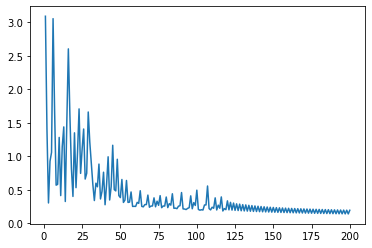

In [45]:
plt.plot(ep, c)
plt.show()

## Exercice : 

__1/ Implement the Stochastic Gradient Method with constant step.__

### _Parameters for the Stochastic Gradient Method and for the Neural network_

In [8]:
to = .01           # fixed step size of the gradient descent algorithm
Nepoch = 200     # Number of epochs 
ndata=1000
plot_period = 20

CardNodes = (2, 4, 6, 4, 1)
NN = ToyNN(card = CardNodes, coef_bounds=(-1,1,-1,1), chi="tanh", grid=(-1,1,41))

### _Stochastic Gradient Iterations_

Epoch: 1, Cost: 0.24056666566026064
Epoch: 2, Cost: 0.17099509512516514
Epoch: 3, Cost: 0.12255360176328303
Epoch: 4, Cost: 0.13426373204656356
Epoch: 5, Cost: 0.10183992343355244
Epoch: 6, Cost: 0.09326758677428508
Epoch: 7, Cost: 0.09638432179407865
Epoch: 8, Cost: 0.08282010872406274
Epoch: 9, Cost: 0.1428903084304338
Epoch: 10, Cost: 0.08653233389217971
Epoch: 11, Cost: 0.08069789700942694
Epoch: 12, Cost: 0.09704620591340368
Epoch: 13, Cost: 0.07574837464401557
Epoch: 14, Cost: 0.07515751226481086
Epoch: 15, Cost: 0.07177403982497921
Epoch: 16, Cost: 0.09478511390191174
Epoch: 17, Cost: 0.10687313053644855
Epoch: 18, Cost: 0.09199692079159105
Epoch: 19, Cost: 0.05903933155434913
Epoch: 20, Cost: 0.06453305412507247


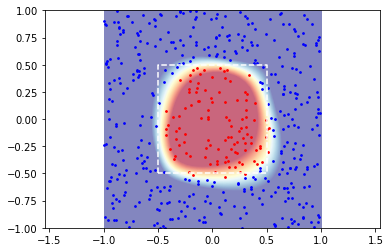

Epoch: 21, Cost: 0.0767305063932965
Epoch: 22, Cost: 0.06308208414553583
Epoch: 23, Cost: 0.06797605180603102
Epoch: 24, Cost: 0.06019145692720888
Epoch: 25, Cost: 0.08152164970122623
Epoch: 26, Cost: 0.06131739255281659
Epoch: 27, Cost: 0.06776636325081754
Epoch: 28, Cost: 0.05556474543413245
Epoch: 29, Cost: 0.057148850124747866
Epoch: 30, Cost: 0.058476856340601
Epoch: 31, Cost: 0.11471624394962211
Epoch: 32, Cost: 0.06724253334787966
Epoch: 33, Cost: 0.07633088795532378
Epoch: 34, Cost: 0.060882063751172895
Epoch: 35, Cost: 0.06130816250567315
Epoch: 36, Cost: 0.04911950430257086
Epoch: 37, Cost: 0.05271801433759532
Epoch: 38, Cost: 0.04967511448396287
Epoch: 39, Cost: 0.048770345812038804
Epoch: 40, Cost: 0.08851999926610557


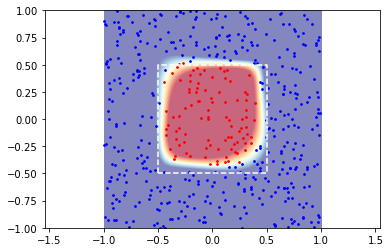

Epoch: 41, Cost: 0.05599278591142672
Epoch: 42, Cost: 0.047199418626657164
Epoch: 43, Cost: 0.07007932435064053
Epoch: 44, Cost: 0.055079106553164725
Epoch: 45, Cost: 0.06551665060734284
Epoch: 46, Cost: 0.045495211198905545
Epoch: 47, Cost: 0.043409152030885675
Epoch: 48, Cost: 0.06387413703006346
Epoch: 49, Cost: 0.042558155725725785
Epoch: 50, Cost: 0.09213044662739918
Epoch: 51, Cost: 0.04102845554530969
Epoch: 52, Cost: 0.0651553785022572
Epoch: 53, Cost: 0.04883478271869042
Epoch: 54, Cost: 0.05003867917647897
Epoch: 55, Cost: 0.05079591573070789
Epoch: 56, Cost: 0.05388867761799868
Epoch: 57, Cost: 0.04006391371320837
Epoch: 58, Cost: 0.06152257808998869
Epoch: 59, Cost: 0.08010322901767564
Epoch: 60, Cost: 0.03772008273082132


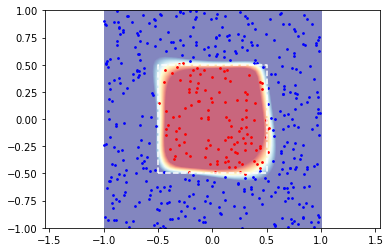

Epoch: 61, Cost: 0.044537612688893634
Epoch: 62, Cost: 0.05515555353065981
Epoch: 63, Cost: 0.05416379916345893
Epoch: 64, Cost: 0.05060539713470359
Epoch: 65, Cost: 0.04381052798010886
Epoch: 66, Cost: 0.06950284380287423
Epoch: 67, Cost: 0.04542082778271692
Epoch: 68, Cost: 0.07097930711260134
Epoch: 69, Cost: 0.04030245839888241
Epoch: 70, Cost: 0.072550898580559
Epoch: 71, Cost: 0.05252749180863232
Epoch: 72, Cost: 0.04388967778146815
Epoch: 73, Cost: 0.03535530495459638
Epoch: 74, Cost: 0.03205537134344498
Epoch: 75, Cost: 0.04019424484467472
Epoch: 76, Cost: 0.06135770628628792
Epoch: 77, Cost: 0.05567002261658903
Epoch: 78, Cost: 0.032876993830577614
Epoch: 79, Cost: 0.0366494112883698
Epoch: 80, Cost: 0.03972110974377943


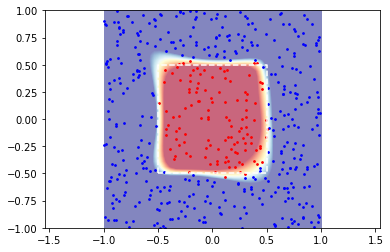

Epoch: 81, Cost: 0.05597519055820468
Epoch: 82, Cost: 0.03407501007581077
Epoch: 83, Cost: 0.04640980236887148
Epoch: 84, Cost: 0.039686220049888914
Epoch: 85, Cost: 0.04894470373260152
Epoch: 86, Cost: 0.040023733053319646
Epoch: 87, Cost: 0.0452401714313053
Epoch: 88, Cost: 0.04412058232306808
Epoch: 89, Cost: 0.04985165310486636
Epoch: 90, Cost: 0.03230261046151211
Epoch: 91, Cost: 0.05409676690584755
Epoch: 92, Cost: 0.032735785631458875
Epoch: 93, Cost: 0.03999705417338281
Epoch: 94, Cost: 0.05111184031132198
Epoch: 95, Cost: 0.04082847914881605
Epoch: 96, Cost: 0.032567598892191664
Epoch: 97, Cost: 0.040204137885923655
Epoch: 98, Cost: 0.04915814991149902
Epoch: 99, Cost: 0.038272954040496
Epoch: 100, Cost: 0.03941372388163901


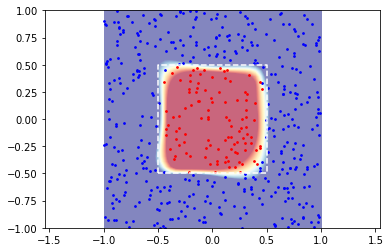

Epoch: 101, Cost: 0.039643440613645047
Epoch: 102, Cost: 0.04277273996213778
Epoch: 103, Cost: 0.05664576106354243
Epoch: 104, Cost: 0.05100123372912225
Epoch: 105, Cost: 0.04695888447063976
Epoch: 106, Cost: 0.037722096372266575
Epoch: 107, Cost: 0.08301487894573432
Epoch: 108, Cost: 0.04394350743441256
Epoch: 109, Cost: 0.07258374877005501
Epoch: 110, Cost: 0.041662597861168896
Epoch: 111, Cost: 0.046172115702029976
Epoch: 112, Cost: 0.03519748693388892
Epoch: 113, Cost: 0.037534262685879186
Epoch: 114, Cost: 0.045726484183318275
Epoch: 115, Cost: 0.04971286513032837
Epoch: 116, Cost: 0.04406416379468976
Epoch: 117, Cost: 0.13059344770793957
Epoch: 118, Cost: 0.04296771870311915
Epoch: 119, Cost: 0.06421566659336682
Epoch: 120, Cost: 0.04221236780425019


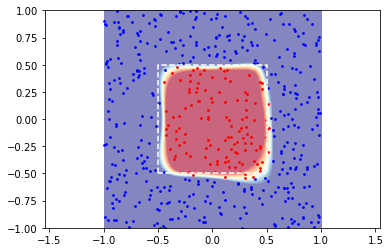

Epoch: 121, Cost: 0.03641178151003585
Epoch: 122, Cost: 0.04421576468365497
Epoch: 123, Cost: 0.05234050440370037
Epoch: 124, Cost: 0.044588896370307204
Epoch: 125, Cost: 0.05582545329760618
Epoch: 126, Cost: 0.03126231948084996
Epoch: 127, Cost: 0.04172209533033891
Epoch: 128, Cost: 0.09677427549051508
Epoch: 129, Cost: 0.040015272967032715
Epoch: 130, Cost: 0.041438351516721365
Epoch: 131, Cost: 0.03549851753389013
Epoch: 132, Cost: 0.038378789881853136
Epoch: 133, Cost: 0.07205374305292031
Epoch: 134, Cost: 0.0491812536526492
Epoch: 135, Cost: 0.0405308572698262
Epoch: 136, Cost: 0.052099749925377956
Epoch: 137, Cost: 0.15592022295293048
Epoch: 138, Cost: 0.046123727998348414
Epoch: 139, Cost: 0.04264579961680646
Epoch: 140, Cost: 0.037304985781334045


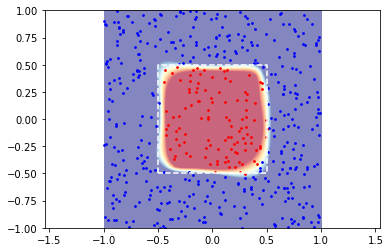

Epoch: 141, Cost: 0.035585777933365204
Epoch: 142, Cost: 0.04159467685596444
Epoch: 143, Cost: 0.06482763421319421
Epoch: 144, Cost: 0.05914470312016739
Epoch: 145, Cost: 0.06638137429999423
Epoch: 146, Cost: 0.0426200424203272
Epoch: 147, Cost: 0.08282621530476289
Epoch: 148, Cost: 0.03813182640505084
Epoch: 149, Cost: 0.029407596536299284
Epoch: 150, Cost: 0.03751646394453684
Epoch: 151, Cost: 0.04071949587654193
Epoch: 152, Cost: 0.039904812818914434
Epoch: 153, Cost: 0.03906950905115139
Epoch: 154, Cost: 0.04259220467095651
Epoch: 155, Cost: 0.045478473131163016
Epoch: 156, Cost: 0.034404019493234565
Epoch: 157, Cost: 0.04135300405987676
Epoch: 158, Cost: 0.033554551868071
Epoch: 159, Cost: 0.02789323364365036
Epoch: 160, Cost: 0.047355920151290136


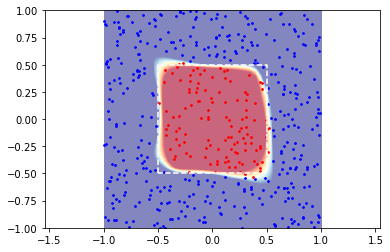

Epoch: 161, Cost: 0.046056795408289136
Epoch: 162, Cost: 0.055777949178381706
Epoch: 163, Cost: 0.05452383663943256
Epoch: 164, Cost: 0.03389043857118531
Epoch: 165, Cost: 0.035496774817959674
Epoch: 166, Cost: 0.048961410382189534
Epoch: 167, Cost: 0.03713743283286837
Epoch: 168, Cost: 0.035951241081365486
Epoch: 169, Cost: 0.0659672128046716
Epoch: 170, Cost: 0.03499841486965387
Epoch: 171, Cost: 0.03957445033738863
Epoch: 172, Cost: 0.031109866026078146
Epoch: 173, Cost: 0.03534405015448966
Epoch: 174, Cost: 0.03156286461107643
Epoch: 175, Cost: 0.05031618724542149
Epoch: 176, Cost: 0.03736200954798665
Epoch: 177, Cost: 0.03818439520725434
Epoch: 178, Cost: 0.028517790763674607
Epoch: 179, Cost: 0.027649484052519276
Epoch: 180, Cost: 0.03231725569100643


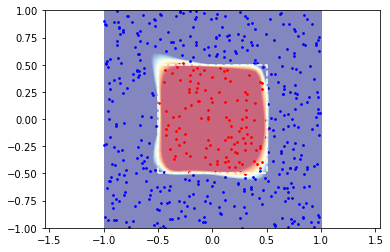

Epoch: 181, Cost: 0.0530821094632423
Epoch: 182, Cost: 0.0541676897510458
Epoch: 183, Cost: 0.08076296925627433
Epoch: 184, Cost: 0.03725156046259925
Epoch: 185, Cost: 0.09411355499942912
Epoch: 186, Cost: 0.05899140750558943
Epoch: 187, Cost: 0.04116251408597373
Epoch: 188, Cost: 0.05367228322910688
Epoch: 189, Cost: 0.02836118966145678
Epoch: 190, Cost: 0.05692615440266617
Epoch: 191, Cost: 0.028193697225249642
Epoch: 192, Cost: 0.02565838386644862
Epoch: 193, Cost: 0.029930805556758804
Epoch: 194, Cost: 0.03407894873168345
Epoch: 195, Cost: 0.03923240081710237
Epoch: 196, Cost: 0.041578068697328135
Epoch: 197, Cost: 0.06061292491524742
Epoch: 198, Cost: 0.04700517713539301
Epoch: 199, Cost: 0.02555468814844496
Epoch: 200, Cost: 0.028042543471985884


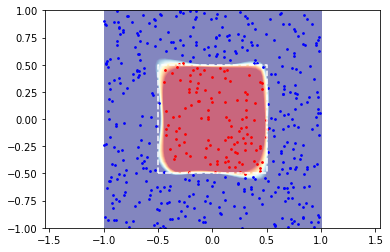

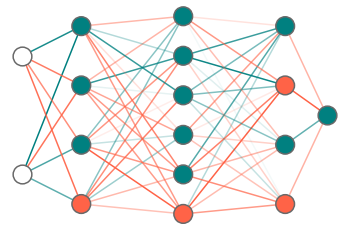

In [9]:
ep = []
c = []
### Iterations (no sub_iterations)
for epoch in range(1, Nepoch + 1):
    ## Computation of the descent direction
    # 0-initialization of the descent vectors
    
    # computation and summation over the data of their contributions to the total descent   
    for j in range (ndata) :
        NN.init_vector()

        i = rd.randint(0, ndata-1)
        Desc_W, Desc_Bias = NN.descent(X=DATA.X[i], y=DATA.Y[i], pb=pb, tau=to)
        #NN.add_to_vector(Desc_W, Desc_Bias)
    #NN.mult_vector(1/ndata)       # renormalization of the sum of descent vectors      
        # Update of the parameters
        #NN.add_vector_to_coefs()
        NN.add_to_coefs(Desc_W, Desc_Bias)


#computation of the error (sum of test losses)
    if epoch%plot_period==0:
        cost = NN.total_loss_and_prediction(DATA=TEST, pb = pb)
        title = "Epoch: " + str(epoch) + ", Cost: " + str(cost)
        print(title)
        NN.show_pred()
        TEST.show_class(pred="yes")
        pb.show_border('w--')
        plt.show()
    else:
        cost  = NN.total_loss(DATA=TEST, pb=pb)
        title = "Epoch: " + str(epoch) + ", Cost: " + str(cost)
        print(title)
        
    c.append(cost)
    ep.append(epoch)

NN.show() 

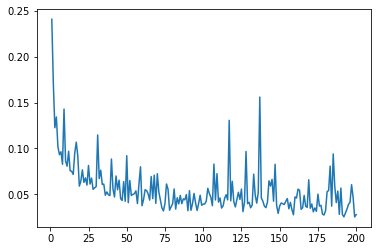

In [10]:
plt.plot(ep, c)
plt.show()

__2/ Observe and comment the convergence properties with the full batch metod.__

The full batch method offers a less precise estimation than Stochastic Gradient Method with constant step. Indeed, at the end of the 200 epochs, the cost is more important with the full batch method. However, the cost oscillates strongly with Stochastic Gradient Method with constant step.

__3/ Implement the Stochastic Gradient Method with decreasing step sizes:__
$$\tau^k := \dfrac{\gamma \tau^0}{\gamma + k}.$$

Epoch: 1, Cost: 0.2653955930059884
Epoch: 2, Cost: 0.297737483439823
Epoch: 3, Cost: 0.26889368866250796
Epoch: 4, Cost: 0.2931083976052002
Epoch: 5, Cost: 0.2534942396934693
Epoch: 6, Cost: 0.24222282864476077
Epoch: 7, Cost: 0.23124133041221304
Epoch: 8, Cost: 0.21928411142752277
Epoch: 9, Cost: 0.2246490671088775
Epoch: 10, Cost: 0.2033758917701762
Epoch: 11, Cost: 0.1850673077108545
Epoch: 12, Cost: 0.1592535392144551
Epoch: 13, Cost: 0.12267813014108338
Epoch: 14, Cost: 0.10720192954659219
Epoch: 15, Cost: 0.11188908750774494
Epoch: 16, Cost: 0.1002926418297514
Epoch: 17, Cost: 0.09145868482345652
Epoch: 18, Cost: 0.09739768545817985
Epoch: 19, Cost: 0.10175570883196461
Epoch: 20, Cost: 0.0913697741690386


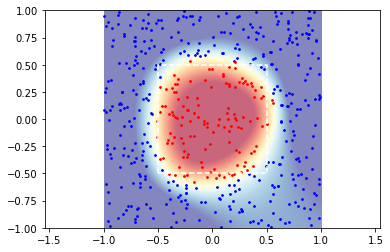

Epoch: 21, Cost: 0.08648410300776559
Epoch: 22, Cost: 0.08748144553233607
Epoch: 23, Cost: 0.0782165935700998
Epoch: 24, Cost: 0.07852525491052866
Epoch: 25, Cost: 0.08230038434249763
Epoch: 26, Cost: 0.09123219209699153
Epoch: 27, Cost: 0.08257830961146524
Epoch: 28, Cost: 0.09151821940010829
Epoch: 29, Cost: 0.0741116963008479
Epoch: 30, Cost: 0.07696430970964639
Epoch: 31, Cost: 0.0828687038305828
Epoch: 32, Cost: 0.07500832213741801
Epoch: 33, Cost: 0.08295757267047502
Epoch: 34, Cost: 0.0878963723343366
Epoch: 35, Cost: 0.07596359545382066
Epoch: 36, Cost: 0.07088721113864258
Epoch: 37, Cost: 0.07883405197450905
Epoch: 38, Cost: 0.09679943100914154
Epoch: 39, Cost: 0.07801680217487465
Epoch: 40, Cost: 0.07337043611386028


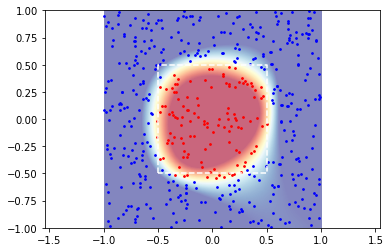

Epoch: 41, Cost: 0.06981515807493777
Epoch: 42, Cost: 0.08232131690336358
Epoch: 43, Cost: 0.07933340058148064
Epoch: 44, Cost: 0.07297380486776608
Epoch: 45, Cost: 0.08478213638110219
Epoch: 46, Cost: 0.07215879624943913
Epoch: 47, Cost: 0.07108444898735686
Epoch: 48, Cost: 0.0751575154681263
Epoch: 49, Cost: 0.07535265734322627
Epoch: 50, Cost: 0.07144070616870586
Epoch: 51, Cost: 0.06762929973187304
Epoch: 52, Cost: 0.07295026847230245
Epoch: 53, Cost: 0.0668659349238003
Epoch: 54, Cost: 0.0693093654825566
Epoch: 55, Cost: 0.09260646536549781
Epoch: 56, Cost: 0.06780271357754004
Epoch: 57, Cost: 0.06802153511143601
Epoch: 58, Cost: 0.07225180716756327
Epoch: 59, Cost: 0.08697088271766246
Epoch: 60, Cost: 0.06877700047823103


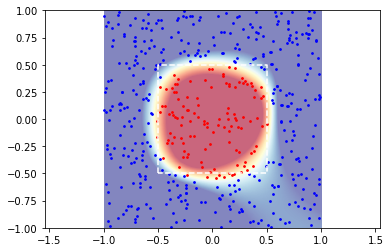

Epoch: 61, Cost: 0.0719933507133394
Epoch: 62, Cost: 0.0716048053187412
Epoch: 63, Cost: 0.08189798166153521
Epoch: 64, Cost: 0.06685778628936725
Epoch: 65, Cost: 0.0676405105182057
Epoch: 66, Cost: 0.0676970059475789
Epoch: 67, Cost: 0.06854297852065012
Epoch: 68, Cost: 0.069942683463104
Epoch: 69, Cost: 0.07072519919900319
Epoch: 70, Cost: 0.06735840682710266
Epoch: 71, Cost: 0.07301020343875317
Epoch: 72, Cost: 0.06786789734701096
Epoch: 73, Cost: 0.06375565808503787
Epoch: 74, Cost: 0.06412455079033118
Epoch: 75, Cost: 0.06596227026619135
Epoch: 76, Cost: 0.06871176881226077
Epoch: 77, Cost: 0.06779978976979768
Epoch: 78, Cost: 0.06568442470456765
Epoch: 79, Cost: 0.07071259707756518
Epoch: 80, Cost: 0.061926638634365365


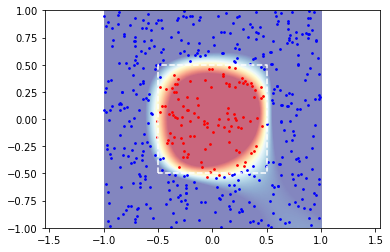

Epoch: 81, Cost: 0.06260054649118614
Epoch: 82, Cost: 0.0694203053110918
Epoch: 83, Cost: 0.06994992750783441
Epoch: 84, Cost: 0.0791377766653778
Epoch: 85, Cost: 0.06727697593899616
Epoch: 86, Cost: 0.06375215273852365
Epoch: 87, Cost: 0.07004366473296277
Epoch: 88, Cost: 0.06689218238762822
Epoch: 89, Cost: 0.06527176705702804
Epoch: 90, Cost: 0.062658057804579
Epoch: 91, Cost: 0.0728942791546081
Epoch: 92, Cost: 0.06239062594286805
Epoch: 93, Cost: 0.0671701724766101
Epoch: 94, Cost: 0.06342504298540771
Epoch: 95, Cost: 0.06245487235481427
Epoch: 96, Cost: 0.06591360663330974
Epoch: 97, Cost: 0.061344966938069886
Epoch: 98, Cost: 0.06377887281966543
Epoch: 99, Cost: 0.0643514939078924
Epoch: 100, Cost: 0.061907779313608226


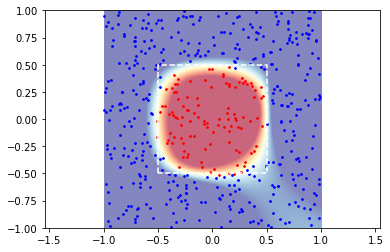

Epoch: 101, Cost: 0.06429733339509126
Epoch: 102, Cost: 0.06179759978673387
Epoch: 103, Cost: 0.05977476672904645
Epoch: 104, Cost: 0.0649609588107223
Epoch: 105, Cost: 0.06332463122089303
Epoch: 106, Cost: 0.060371719389242046
Epoch: 107, Cost: 0.06411698453581564
Epoch: 108, Cost: 0.062108702996542316
Epoch: 109, Cost: 0.06327203016673856
Epoch: 110, Cost: 0.06540608740244641
Epoch: 111, Cost: 0.05912331835015294
Epoch: 112, Cost: 0.057837275360419556
Epoch: 113, Cost: 0.062380970816812736
Epoch: 114, Cost: 0.06160968023046139
Epoch: 115, Cost: 0.05848113409661041
Epoch: 116, Cost: 0.05992333671172619
Epoch: 117, Cost: 0.06363153020694218
Epoch: 118, Cost: 0.05942465182119493
Epoch: 119, Cost: 0.06699058924509581
Epoch: 120, Cost: 0.06288564008783223


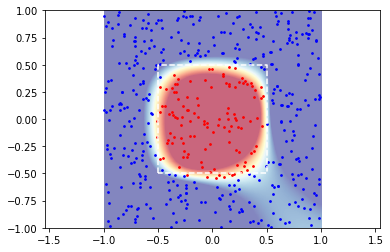

Epoch: 121, Cost: 0.06056006665385593
Epoch: 122, Cost: 0.05979217946399636
Epoch: 123, Cost: 0.06269529468477782
Epoch: 124, Cost: 0.06257527184471763
Epoch: 125, Cost: 0.05822919208214586
Epoch: 126, Cost: 0.058284266464710965
Epoch: 127, Cost: 0.05858313723956546
Epoch: 128, Cost: 0.06297378284762323
Epoch: 129, Cost: 0.06770463238000987
Epoch: 130, Cost: 0.06425699768515933
Epoch: 131, Cost: 0.05750321873662837
Epoch: 132, Cost: 0.06538874396378959
Epoch: 133, Cost: 0.05921681945015592
Epoch: 134, Cost: 0.0642922172468391
Epoch: 135, Cost: 0.058734664371994386
Epoch: 136, Cost: 0.056730807207200015
Epoch: 137, Cost: 0.05529539793931267
Epoch: 138, Cost: 0.06136246868504339
Epoch: 139, Cost: 0.05547475353713018
Epoch: 140, Cost: 0.06192558859154675


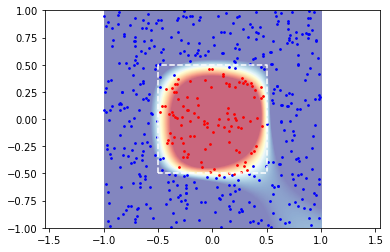

Epoch: 141, Cost: 0.055523694517958
Epoch: 142, Cost: 0.06894010789628216
Epoch: 143, Cost: 0.055592514097672414
Epoch: 144, Cost: 0.06177649238899568
Epoch: 145, Cost: 0.05559840674451413
Epoch: 146, Cost: 0.05556248904036738
Epoch: 147, Cost: 0.05591095410456318
Epoch: 148, Cost: 0.055261482845316734
Epoch: 149, Cost: 0.057122557675084146
Epoch: 150, Cost: 0.05603831395414615
Epoch: 151, Cost: 0.055793244183569436
Epoch: 152, Cost: 0.059560561182976174
Epoch: 153, Cost: 0.062462841137037844
Epoch: 154, Cost: 0.05459959170296156
Epoch: 155, Cost: 0.05344491898762022
Epoch: 156, Cost: 0.06268509338364896
Epoch: 157, Cost: 0.0680943854643656
Epoch: 158, Cost: 0.05904660300465905
Epoch: 159, Cost: 0.06235590179222368
Epoch: 160, Cost: 0.053093278919537544


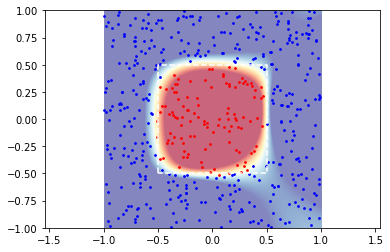

Epoch: 161, Cost: 0.05814328155436395
Epoch: 162, Cost: 0.05263023951555657
Epoch: 163, Cost: 0.05756014381363482
Epoch: 164, Cost: 0.052887764469797954
Epoch: 165, Cost: 0.05399934328448395
Epoch: 166, Cost: 0.052493629790782204
Epoch: 167, Cost: 0.051663953024694516
Epoch: 168, Cost: 0.05281411055620779
Epoch: 169, Cost: 0.054117037125297605
Epoch: 170, Cost: 0.05885381249762075
Epoch: 171, Cost: 0.05441850341001225
Epoch: 172, Cost: 0.05397664867469028
Epoch: 173, Cost: 0.055214656422431715
Epoch: 174, Cost: 0.052194936681138074
Epoch: 175, Cost: 0.06732067556975167
Epoch: 176, Cost: 0.05706280496913441
Epoch: 177, Cost: 0.05765094742695929
Epoch: 178, Cost: 0.05776730275089228
Epoch: 179, Cost: 0.05227268670738374
Epoch: 180, Cost: 0.06154579833567336


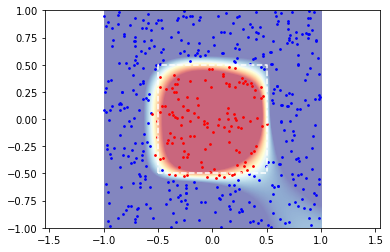

Epoch: 181, Cost: 0.051228236818315794
Epoch: 182, Cost: 0.05614899360638787
Epoch: 183, Cost: 0.05317671985762915
Epoch: 184, Cost: 0.05128852886935024
Epoch: 185, Cost: 0.050631485212012675
Epoch: 186, Cost: 0.058297824966556354
Epoch: 187, Cost: 0.05073876768052389
Epoch: 188, Cost: 0.05776475550817874
Epoch: 189, Cost: 0.04987871911907787
Epoch: 190, Cost: 0.05172217732257784
Epoch: 191, Cost: 0.052562751834948754
Epoch: 192, Cost: 0.04980959092806674
Epoch: 193, Cost: 0.050311418017737884
Epoch: 194, Cost: 0.05075128448869336
Epoch: 195, Cost: 0.05824648393044468
Epoch: 196, Cost: 0.05217112334595667
Epoch: 197, Cost: 0.05056742607747003
Epoch: 198, Cost: 0.05228150560985543
Epoch: 199, Cost: 0.04994550838846864
Epoch: 200, Cost: 0.05645843185582569


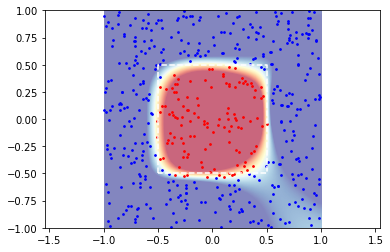

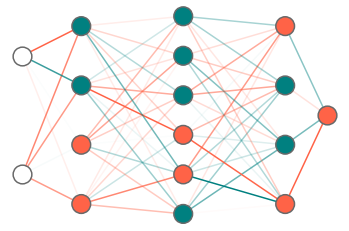

In [68]:
ep = []
c = []

### Iterations (no sub_iterations)
tau0 = 0.01
gamma = 10000
for epoch in range(1, Nepoch + 1):
    ## Computation of the descent direction
    # 0-initialization of the descent vectors
    
    # computation and summation over the data of their contributions to the total descent   
    for j in range (ndata) :
        NN.init_vector()
        k = (epoch*ndata + j)
        tau = (gamma*tau0)/(gamma + k)
        i = rd.randint(0, ndata-1)
        Desc_W, Desc_Bias = NN.descent(X=DATA.X[i], y=DATA.Y[i], pb=pb, tau=tau)
        #NN.add_to_vector(Desc_W, Desc_Bias)
    #NN.mult_vector(1/ndata)       # renormalization of the sum of descent vectors      
        # Update of the parameters
        #NN.add_vector_to_coefs()
        NN.add_to_coefs(Desc_W, Desc_Bias)


#computation of the error (sum of test losses)
    if epoch%plot_period==0:
        cost = NN.total_loss_and_prediction(DATA=TEST, pb = pb)
        title = "Epoch: " + str(epoch) + ", Cost: " + str(cost)
        print(title)
        NN.show_pred()
        TEST.show_class(pred="yes")
        pb.show_border('w--')
        plt.show()
    else:
        cost  = NN.total_loss(DATA=TEST, pb=pb)
        title = "Epoch: " + str(epoch) + ", Cost: " + str(cost)
        print(title)
    c.append(cost)
    ep.append(epoch)
    
NN.show()

In [ ]:
plt.plot(ep, c)
plt.show()

__4/ Do you observe an improvement? Do you find an empirical method for the choice $\tau^0$ and $\gamma$?__

We observe an improvement. Indeed, the Stochastic Gradient Method with decreasing step sizes offers a cost that reaches a relative stability from 100 epochs. We need to choose find the good tau0, and then, we take gamma = 10*ndata

In [56]:
### Iterations (no sub_iterations)
tau = [0.01, 0.05, 0.1, 0.2, 0.5, 1]
gam = [1000, 1500, 2000, 2500, 3000]

for tau0 in tau :
    for gamma in gam :
        ep = []
        c = []
        for epoch in range(1, Nepoch + 1):
    ## Computation of the descent direction
    # 0-initialization of the descent vectors
    
    # computation and summation over the data of their contributions to the total descent   
            for j in range (ndata) :
                NN.init_vector()
                k = (epoch*ndata + j)
                tau = (gamma*tau0)/(gamma + k)
                i = rd.randint(0, ndata-1)
                Desc_W, Desc_Bias = NN.descent(X=DATA.X[i], y=DATA.Y[i], pb=pb, tau=tau)
        #NN.add_to_vector(Desc_W, Desc_Bias)
    #NN.mult_vector(1/ndata)       # renormalization of the sum of descent vectors      
        # Update of the parameters
        #NN.add_vector_to_coefs()
                NN.add_to_coefs(Desc_W, Desc_Bias)


#computation of the error (sum of test losses)
            if epoch%plot_period==0:
                cost = NN.total_loss_and_prediction(DATA=TEST, pb = pb)
                #NN.show_pred()
                #TEST.show_class(pred="yes")
                #pb.show_border('w--')
                #plt.show()
            else:
                cost  = NN.total_loss(DATA=TEST, pb=pb)
                
            c.append(cost)
            ep.append(epoch)
        
        print (tau0, gamma, min(c))
    


0.01 1000 0.08142023263163126
0.01 1500 0.0762468474766307
0.01 2000 0.0678313466974688
0.01 2500 0.055664482485946035
0.01 3000 0.036848376647110555
0.05 1000 0.025860655593943634


KeyboardInterrupt: 

__5/ Try the ring problem__ pb = ToyPb(name = "ring", bounds = (-1,1)). __What is the behavior of the full batch method on this problem.__

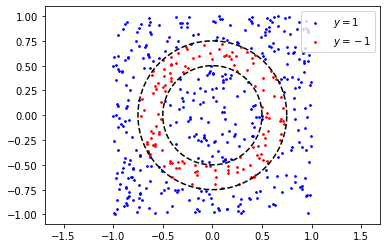

In [46]:
pb = ToyPb(name = "ring", bounds = (-1,1))
ndata = 1000
DATA = nD_data(n = ndata, pb = pb)

ntest = 500
TEST = nD_data(n = ntest, pb = pb, init_pred='yes')

TEST.show_class()
pb.show_border('k--')
plt.legend(loc=1)
plt.show()

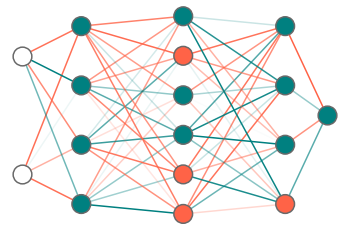

In [47]:
CardNodes = (2, 4, 6, 4, 1)
NN = ToyNN(card = CardNodes, coef_bounds=(-1,1,-1,1), chi="tanh", grid=(-1,1,41))
NN.show()

Epoch: 0, Cost: 0.6431319947364273


[]

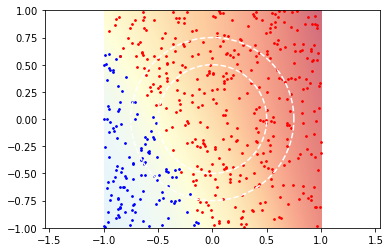

In [48]:
to = 0.05   # fixed step size of the gradient descent algorithm
Nepoch = 200    # Number of epochs 

plot_period = 20

NN = ToyNN(card = CardNodes, coef_bounds=(-1,1,-1,1), chi="tanh", grid=(-1,1,41))

cost  = NN.total_loss_and_prediction(pb=pb, DATA=TEST)
title = "Epoch: " + str(0) + ", Cost: " + str(cost)
print(title)
NN.show_pred()
TEST.show_class(pred="ok")
pb.show_border('w--')
plt.plot()

Epoch: 1, Cost: 0.4380450529673841
Epoch: 2, Cost: 0.3107424187714834
Epoch: 3, Cost: 0.2961849010375966
Epoch: 4, Cost: 0.29350433159064393
Epoch: 5, Cost: 0.292449505198489
Epoch: 6, Cost: 0.2916931634520946
Epoch: 7, Cost: 0.2910092151855615
Epoch: 8, Cost: 0.29035782064034954
Epoch: 9, Cost: 0.28973334499278813
Epoch: 10, Cost: 0.2891355106094393
Epoch: 11, Cost: 0.28856414519869034
Epoch: 12, Cost: 0.28801856790124675
Epoch: 13, Cost: 0.2874977492217673
Epoch: 14, Cost: 0.2870004999947678
Epoch: 15, Cost: 0.286525589299842
Epoch: 16, Cost: 0.2860718063438332
Epoch: 17, Cost: 0.2856379896105684
Epoch: 18, Cost: 0.2852230387466101
Epoch: 19, Cost: 0.2848259178105676
Epoch: 20, Cost: 0.28444565438629393


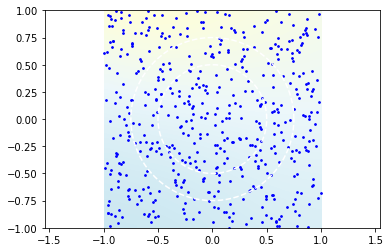

Epoch: 21, Cost: 0.2840813368319653
Epoch: 22, Cost: 0.2837321107883149
Epoch: 23, Cost: 0.2833971754901115
Epoch: 24, Cost: 0.2830757801365496
Epoch: 25, Cost: 0.2827672204339664
Epoch: 26, Cost: 0.2824708353548176
Epoch: 27, Cost: 0.28218600412350753
Epoch: 28, Cost: 0.28191214342414306
Epoch: 29, Cost: 0.28164870481848064
Epoch: 30, Cost: 0.28139517235983147
Epoch: 31, Cost: 0.2811510603881638
Epoch: 32, Cost: 0.2809159114921041
Epoch: 33, Cost: 0.2806892946243603
Epoch: 34, Cost: 0.2804708033580821
Epoch: 35, Cost: 0.28026005427266804
Epoch: 36, Cost: 0.28005668545848983
Epoch: 37, Cost: 0.2798603551309078
Epoch: 38, Cost: 0.27967074034477635
Epoch: 39, Cost: 0.2794875358013955
Epoch: 40, Cost: 0.2793104527405666


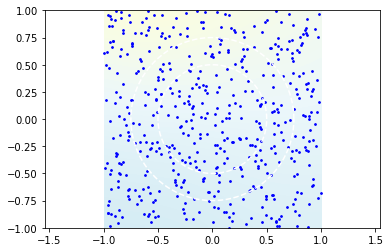

Epoch: 41, Cost: 0.27913921791103546
Epoch: 42, Cost: 0.2789735726131768
Epoch: 43, Cost: 0.2788132718083072
Epoch: 44, Cost: 0.27865808328948144
Epoch: 45, Cost: 0.27850778690905903
Epoch: 46, Cost: 0.27836217385872836
Epoch: 47, Cost: 0.2782210459980219
Epoch: 48, Cost: 0.278084215227706
Epoch: 49, Cost: 0.27795150290469145
Epoch: 50, Cost: 0.27782273929541407
Epoch: 51, Cost: 0.2776977630648746
Epoch: 52, Cost: 0.2775764207987307
Epoch: 53, Cost: 0.27745856655608075
Epoch: 54, Cost: 0.2773440614507252
Epoch: 55, Cost: 0.27723277325889784
Epoch: 56, Cost: 0.27712457605159746
Epoch: 57, Cost: 0.27701934984980153
Epoch: 58, Cost: 0.27691698030097317
Epoch: 59, Cost: 0.27681735837539667
Epoch: 60, Cost: 0.276720380080992


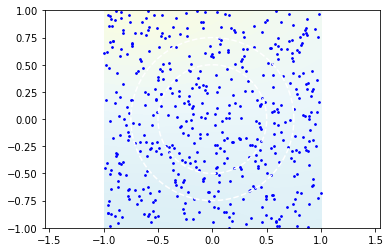

Epoch: 61, Cost: 0.2766259461953474
Epoch: 62, Cost: 0.27653396201381214
Epoch: 63, Cost: 0.2764443371125849
Epoch: 64, Cost: 0.27635698512579704
Epoch: 65, Cost: 0.2762718235356633
Epoch: 66, Cost: 0.27618877347486404
Epoch: 67, Cost: 0.27610775954034833
Epoch: 68, Cost: 0.27602870961782855
Epoch: 69, Cost: 0.275951554716286
Epoch: 70, Cost: 0.2758762288118494
Epoch: 71, Cost: 0.2758026687004539
Epoch: 72, Cost: 0.27573081385873105
Epoch: 73, Cost: 0.2756606063126245
Epoch: 74, Cost: 0.27559199051324357
Epoch: 75, Cost: 0.27552491321951983
Epoch: 76, Cost: 0.2754593233872524
Epoch: 77, Cost: 0.27539517206414355
Epoch: 78, Cost: 0.2753324122904838
Epoch: 79, Cost: 0.2752709990051323
Epoch: 80, Cost: 0.2752108889564895


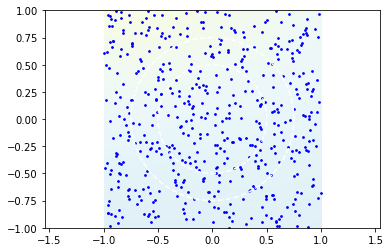

Epoch: 81, Cost: 0.27515204061816123
Epoch: 82, Cost: 0.275094414109041
Epoch: 83, Cost: 0.2750379711175602
Epoch: 84, Cost: 0.2749826748298549
Epoch: 85, Cost: 0.2749284898616298
Epoch: 86, Cost: 0.2748753821935113
Epoch: 87, Cost: 0.2748233191096828
Epoch: 88, Cost: 0.2747722691396288
Epoch: 89, Cost: 0.2747222020028028
Epoch: 90, Cost: 0.2746730885560601
Epoch: 91, Cost: 0.2746249007437114
Epoch: 92, Cost: 0.2745776115500311
Epoch: 93, Cost: 0.2745311949541119
Epoch: 94, Cost: 0.27448562588691927
Epoch: 95, Cost: 0.2744408801904332
Epoch: 96, Cost: 0.2743969345787672
Epoch: 97, Cost: 0.2743537666011552
Epoch: 98, Cost: 0.2743113546067071
Epoch: 99, Cost: 0.27426967771084276
Epoch: 100, Cost: 0.2742287157633119


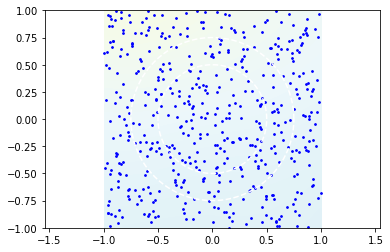

Epoch: 101, Cost: 0.2741884493177199
Epoch: 102, Cost: 0.2741488596024798
Epoch: 103, Cost: 0.2741099284931173
Epoch: 104, Cost: 0.2740716384858573
Epoch: 105, Cost: 0.274033972672431
Epoch: 106, Cost: 0.2739969147160337
Epoch: 107, Cost: 0.2739604488283831
Epoch: 108, Cost: 0.2739245597478164
Epoch: 109, Cost: 0.2738892327183789
Epoch: 110, Cost: 0.2738544534698498
Epoch: 111, Cost: 0.27382020819866226
Epoch: 112, Cost: 0.2737864835496729
Epoch: 113, Cost: 0.27375326659873556
Epoch: 114, Cost: 0.27372054483604846
Epoch: 115, Cost: 0.2736883061502235
Epoch: 116, Cost: 0.27365653881305724
Epoch: 117, Cost: 0.2736252314649601
Epoch: 118, Cost: 0.273594373101014
Epoch: 119, Cost: 0.27356395305763226
Epoch: 120, Cost: 0.27353396099978955


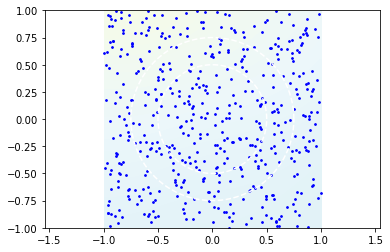

Epoch: 121, Cost: 0.27350438690879186
Epoch: 122, Cost: 0.27347522107057054
Epoch: 123, Cost: 0.27344645406446705
Epoch: 124, Cost: 0.27341807675248864
Epoch: 125, Cost: 0.27339008026901235
Epoch: 126, Cost: 0.27336245601091913
Epoch: 127, Cost: 0.27333519562813546
Epoch: 128, Cost: 0.27330829101456366
Epoch: 129, Cost: 0.2732817342993848
Epoch: 130, Cost: 0.27325551783871727
Epoch: 131, Cost: 0.2732296342076129
Epoch: 132, Cost: 0.2732040761923788
Epoch: 133, Cost: 0.2731788367832035
Epoch: 134, Cost: 0.2731539091670863
Epoch: 135, Cost: 0.27312928672104037
Epoch: 136, Cost: 0.2731049630055713
Epoch: 137, Cost: 0.2730809317584109
Epoch: 138, Cost: 0.27305718688849745
Epoch: 139, Cost: 0.27303372247019225
Epoch: 140, Cost: 0.2730105327377216


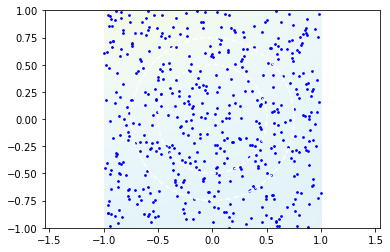

Epoch: 141, Cost: 0.27298761207983335
Epoch: 142, Cost: 0.2729649550346622
Epoch: 143, Cost: 0.2729425562847885
Epoch: 144, Cost: 0.27292041065248906
Epoch: 145, Cost: 0.27289851309516877
Epoch: 146, Cost: 0.2728768587009632
Epoch: 147, Cost: 0.27285544268450973
Epoch: 148, Cost: 0.27283426038287545
Epoch: 149, Cost: 0.27281330725163927
Epoch: 150, Cost: 0.27279257886111813
Epoch: 151, Cost: 0.2727720708927324
Epoch: 152, Cost: 0.2727517791355095
Epoch: 153, Cost: 0.2727316994827109
Epoch: 154, Cost: 0.27271182792858445
Epoch: 155, Cost: 0.27269216056523626
Epoch: 156, Cost: 0.2726726935796126
Epoch: 157, Cost: 0.2726534232505947
Epoch: 158, Cost: 0.2726343459461933
Epoch: 159, Cost: 0.27261545812084714
Epoch: 160, Cost: 0.2725967563128149


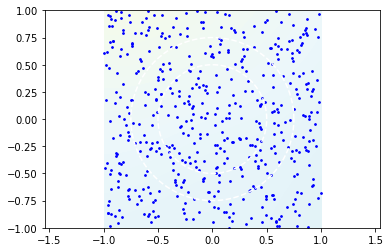

Epoch: 161, Cost: 0.27257823714166307
Epoch: 162, Cost: 0.2725598973058346
Epoch: 163, Cost: 0.27254173358031586
Epoch: 164, Cost: 0.27252374281436736
Epoch: 165, Cost: 0.27250592192935363
Epoch: 166, Cost: 0.27248826791662845
Epoch: 167, Cost: 0.2724707778355083
Epoch: 168, Cost: 0.2724534488113051
Epoch: 169, Cost: 0.27243627803343445
Epoch: 170, Cost: 0.2724192627535785
Epoch: 171, Cost: 0.2724024002839198
Epoch: 172, Cost: 0.27238568799542967
Epoch: 173, Cost: 0.27236912331621455
Epoch: 174, Cost: 0.27235270372992004
Epoch: 175, Cost: 0.27233642677418235
Epoch: 176, Cost: 0.2723202900391376
Epoch: 177, Cost: 0.2723042911659761
Epoch: 178, Cost: 0.27228842784554325
Epoch: 179, Cost: 0.27227269781699037
Epoch: 180, Cost: 0.2722570988664632


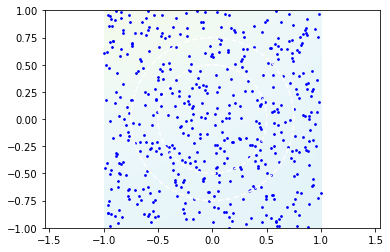

Epoch: 181, Cost: 0.2722416288258393
Epoch: 182, Cost: 0.2722262855715
Epoch: 183, Cost: 0.2722110670231452
Epoch: 184, Cost: 0.2721959711426451
Epoch: 185, Cost: 0.2721809959329293
Epoch: 186, Cost: 0.27216613943690765
Epoch: 187, Cost: 0.27215139973642793
Epoch: 188, Cost: 0.2721367749512669
Epoch: 189, Cost: 0.2721222632381483
Epoch: 190, Cost: 0.27210786278979704
Epoch: 191, Cost: 0.27209357183401717
Epoch: 192, Cost: 0.27207938863280184
Epoch: 193, Cost: 0.27206531148146906
Epoch: 194, Cost: 0.2720513387078231
Epoch: 195, Cost: 0.2720374686713422
Epoch: 196, Cost: 0.27202369976239066
Epoch: 197, Cost: 0.27201003040145527
Epoch: 198, Cost: 0.27199645903840014
Epoch: 199, Cost: 0.2719829841517518
Epoch: 200, Cost: 0.2719696042479976


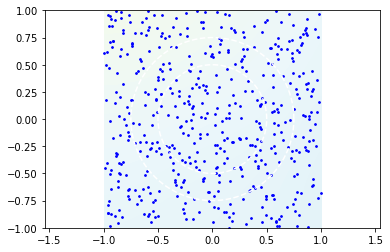

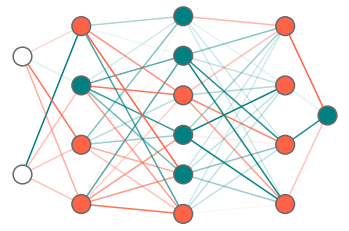

In [37]:
ep = []
c = []

### Iterations (no sub_iterations)
for epoch in range(1, Nepoch + 1):
    ## Computation of the descent direction
    # 0-initialization of the descent vectors
    NN.init_vector()
    # computation and summation over the data of their contributions to the total descent   
    for j in range(ndata):
        Desc_W, Desc_Bias = NN.descent(X=DATA.X[j], y=DATA.Y[j], pb=pb, tau=to)
        NN.add_to_vector(Desc_W, Desc_Bias)
    NN.mult_vector(1/ndata)       # renormalization of the sum of descent vectors      
        # Update of the parameters
    NN.add_vector_to_coefs()


#computation of the error (sum of test losses)
    if epoch%plot_period==0:
        cost = NN.total_loss_and_prediction(DATA=TEST, pb = pb)
        title = "Epoch: " + str(epoch) + ", Cost: " + str(cost)
        print(title)
        NN.show_pred()
        TEST.show_class(pred="yes")
        pb.show_border('w--')
        plt.show()
    else:
        cost  = NN.total_loss(DATA=TEST, pb=pb)
        title = "Epoch: " + str(epoch) + ", Cost: " + str(cost)
        print(title)
    c.append(cost)
    ep.append(epoch)
    
NN.show()  

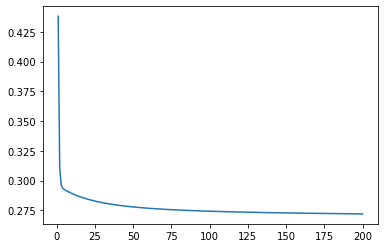

In [38]:
plt.plot(ep, c)
plt.show()

Epoch: 1, Cost: 0.3114685842842925
Epoch: 2, Cost: 0.2739920787462158
Epoch: 3, Cost: 0.2816001680148394
Epoch: 4, Cost: 0.2715082766779166
Epoch: 5, Cost: 0.2669589462287436
Epoch: 6, Cost: 0.2567930277326918
Epoch: 7, Cost: 0.271566670948585
Epoch: 8, Cost: 0.2471806141662358
Epoch: 9, Cost: 0.24316272060030528
Epoch: 10, Cost: 0.24930940715283784
Epoch: 11, Cost: 0.22669270703076383
Epoch: 12, Cost: 0.2205460019515238
Epoch: 13, Cost: 0.21728075016860698
Epoch: 14, Cost: 0.2010231582890794
Epoch: 15, Cost: 0.18116564876824084
Epoch: 16, Cost: 0.17109552159552002
Epoch: 17, Cost: 0.14785510055761064
Epoch: 18, Cost: 0.14141737678187025
Epoch: 19, Cost: 0.1380059181050417
Epoch: 20, Cost: 0.11630465126166988


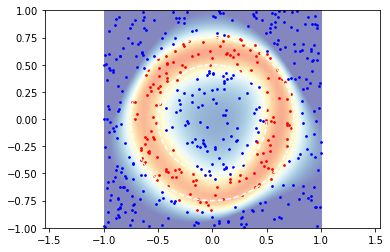

Epoch: 21, Cost: 0.11072809563930897
Epoch: 22, Cost: 0.11088990025535647
Epoch: 23, Cost: 0.091021940154589
Epoch: 24, Cost: 0.16523098257008262
Epoch: 25, Cost: 0.0832769242117968
Epoch: 26, Cost: 0.10982855755539463
Epoch: 27, Cost: 0.15638427628082333
Epoch: 28, Cost: 0.0916370711253133
Epoch: 29, Cost: 0.12911514601077984
Epoch: 30, Cost: 0.08322423361480542
Epoch: 31, Cost: 0.08500514714710661
Epoch: 32, Cost: 0.11112124940314493
Epoch: 33, Cost: 0.10624894279950856
Epoch: 34, Cost: 0.08732856732726772
Epoch: 35, Cost: 0.08381677464129564
Epoch: 36, Cost: 0.09920534338863497
Epoch: 37, Cost: 0.08567037239901641
Epoch: 38, Cost: 0.10611304535135525
Epoch: 39, Cost: 0.07519198429893176
Epoch: 40, Cost: 0.1192384755320618


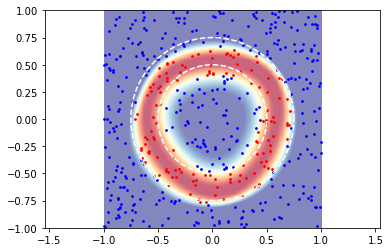

Epoch: 41, Cost: 0.07625909391010247
Epoch: 42, Cost: 0.08100734412210682
Epoch: 43, Cost: 0.07684424490952632
Epoch: 44, Cost: 0.07147771151663278
Epoch: 45, Cost: 0.07612756849512861
Epoch: 46, Cost: 0.08923064010933661
Epoch: 47, Cost: 0.09031839365998733
Epoch: 48, Cost: 0.07366979304887879
Epoch: 49, Cost: 0.0869147532251891
Epoch: 50, Cost: 0.08924592015749634
Epoch: 51, Cost: 0.09271565872264008
Epoch: 52, Cost: 0.0751981078224122
Epoch: 53, Cost: 0.06742453069183882
Epoch: 54, Cost: 0.07099386577086118
Epoch: 55, Cost: 0.07160569859338195
Epoch: 56, Cost: 0.08417565462062288
Epoch: 57, Cost: 0.12305309533794083
Epoch: 58, Cost: 0.08241295117529016
Epoch: 59, Cost: 0.060592165229729704
Epoch: 60, Cost: 0.07227335013239099


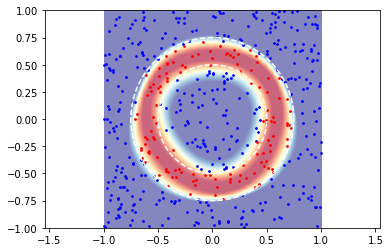

Epoch: 61, Cost: 0.08364134691233362
Epoch: 62, Cost: 0.06935114309212084
Epoch: 63, Cost: 0.07840265368331448
Epoch: 64, Cost: 0.07047922696376914
Epoch: 65, Cost: 0.08084152173805707
Epoch: 66, Cost: 0.06890410423492954
Epoch: 67, Cost: 0.09059823075366208
Epoch: 68, Cost: 0.07085139350726032
Epoch: 69, Cost: 0.0800136595908289
Epoch: 70, Cost: 0.09509251887001437
Epoch: 71, Cost: 0.08465803398593577
Epoch: 72, Cost: 0.08767819168126952
Epoch: 73, Cost: 0.07134038852464217
Epoch: 74, Cost: 0.05669913157282779
Epoch: 75, Cost: 0.0809671414169471
Epoch: 76, Cost: 0.06760473164672003
Epoch: 77, Cost: 0.06537777456741034
Epoch: 78, Cost: 0.07430729239478717
Epoch: 79, Cost: 0.06649196964585531
Epoch: 80, Cost: 0.06325171986522884


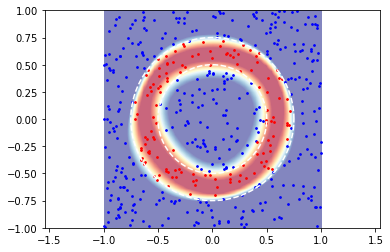

Epoch: 81, Cost: 0.06308594123769995
Epoch: 82, Cost: 0.06279974076222143
Epoch: 83, Cost: 0.09161087827817656
Epoch: 84, Cost: 0.056585568060264005
Epoch: 85, Cost: 0.05927241436574669
Epoch: 86, Cost: 0.07946624601042292
Epoch: 87, Cost: 0.12385541642505571
Epoch: 88, Cost: 0.08952246170155337
Epoch: 89, Cost: 0.0677478565059539
Epoch: 90, Cost: 0.06023881795849155
Epoch: 91, Cost: 0.06850037882830852
Epoch: 92, Cost: 0.05578720923245578
Epoch: 93, Cost: 0.053775051669071275
Epoch: 94, Cost: 0.05474023441771838
Epoch: 95, Cost: 0.057990215855709924
Epoch: 96, Cost: 0.055711208272416914
Epoch: 97, Cost: 0.06433431378737695
Epoch: 98, Cost: 0.0603236557184326
Epoch: 99, Cost: 0.07228964604045816
Epoch: 100, Cost: 0.06878391107232916


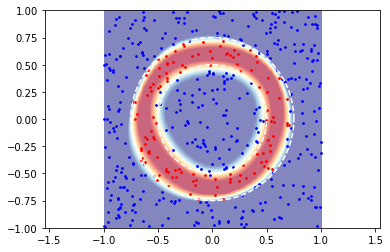

Epoch: 101, Cost: 0.06251172712711231
Epoch: 102, Cost: 0.06854695073365287
Epoch: 103, Cost: 0.07045161779976179
Epoch: 104, Cost: 0.06170631725624596
Epoch: 105, Cost: 0.05877268768559371
Epoch: 106, Cost: 0.06267262928400902
Epoch: 107, Cost: 0.0725260116168749
Epoch: 108, Cost: 0.06445125714252346
Epoch: 109, Cost: 0.05352707845312865
Epoch: 110, Cost: 0.05312737982857176
Epoch: 111, Cost: 0.08941140706556903
Epoch: 112, Cost: 0.05946786828750214
Epoch: 113, Cost: 0.05567051581551055
Epoch: 114, Cost: 0.05031210225828857
Epoch: 115, Cost: 0.0617542608248207
Epoch: 116, Cost: 0.05400307446247854
Epoch: 117, Cost: 0.1023626545750168
Epoch: 118, Cost: 0.054296526471014656
Epoch: 119, Cost: 0.05449700410923862
Epoch: 120, Cost: 0.05542597032058171


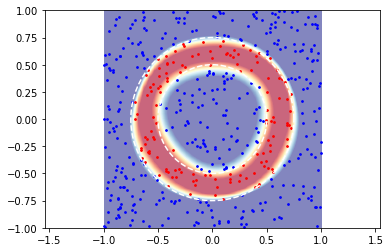

Epoch: 121, Cost: 0.06852138913262268
Epoch: 122, Cost: 0.05099833907522763
Epoch: 123, Cost: 0.08237815579256118
Epoch: 124, Cost: 0.052782036967856556
Epoch: 125, Cost: 0.05605646301903508
Epoch: 126, Cost: 0.08930141828008258
Epoch: 127, Cost: 0.07939243372427303
Epoch: 128, Cost: 0.054425366012128364
Epoch: 129, Cost: 0.05592216025339593
Epoch: 130, Cost: 0.0699695438961289
Epoch: 131, Cost: 0.05363667681516423
Epoch: 132, Cost: 0.06244403549029273
Epoch: 133, Cost: 0.052106641109526376
Epoch: 134, Cost: 0.05497305551287814
Epoch: 135, Cost: 0.05013044560048827
Epoch: 136, Cost: 0.06007689492852928
Epoch: 137, Cost: 0.055182227254584174
Epoch: 138, Cost: 0.06375105405348945
Epoch: 139, Cost: 0.055126850483141414
Epoch: 140, Cost: 0.05982505011392269


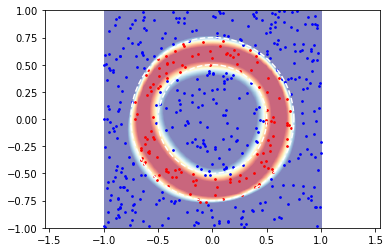

Epoch: 141, Cost: 0.05190993857060356
Epoch: 142, Cost: 0.05347878143225062
Epoch: 143, Cost: 0.05512316203704333
Epoch: 144, Cost: 0.06274365759437422
Epoch: 145, Cost: 0.07196418532122086
Epoch: 146, Cost: 0.051476917547113914
Epoch: 147, Cost: 0.05095296718864693
Epoch: 148, Cost: 0.0562529283984287
Epoch: 149, Cost: 0.05403931167043304
Epoch: 150, Cost: 0.052558397541172155
Epoch: 151, Cost: 0.0508339054060193
Epoch: 152, Cost: 0.047636250137029996
Epoch: 153, Cost: 0.05323166709186433
Epoch: 154, Cost: 0.04814609331584872
Epoch: 155, Cost: 0.047910396942835574
Epoch: 156, Cost: 0.05258968425278668
Epoch: 157, Cost: 0.051836571816430095
Epoch: 158, Cost: 0.048552742951933375
Epoch: 159, Cost: 0.07114780711298134
Epoch: 160, Cost: 0.06409306586283219


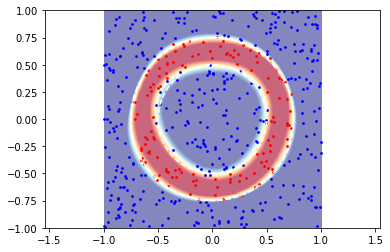

Epoch: 161, Cost: 0.05626328776288367
Epoch: 162, Cost: 0.04815839418566302
Epoch: 163, Cost: 0.04985669293483064
Epoch: 164, Cost: 0.053513735569812995
Epoch: 165, Cost: 0.06080189960162431
Epoch: 166, Cost: 0.05843866361466689
Epoch: 167, Cost: 0.05142389030533977
Epoch: 168, Cost: 0.052829178535337404
Epoch: 169, Cost: 0.05544432330131788
Epoch: 170, Cost: 0.049604851128741835
Epoch: 171, Cost: 0.06111012974723627
Epoch: 172, Cost: 0.053921809033826505
Epoch: 173, Cost: 0.049022069473405386
Epoch: 174, Cost: 0.057089493535965305
Epoch: 175, Cost: 0.05512799765179673
Epoch: 176, Cost: 0.05140160109925084
Epoch: 177, Cost: 0.055518099772670866
Epoch: 178, Cost: 0.06051733928544002
Epoch: 179, Cost: 0.049623054155474765
Epoch: 180, Cost: 0.0555070245706545


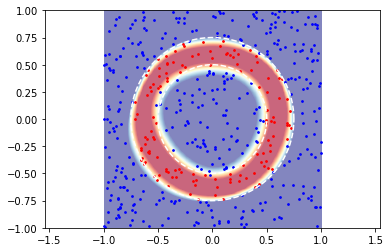

Epoch: 181, Cost: 0.046973557093808696
Epoch: 182, Cost: 0.05134327846138961
Epoch: 183, Cost: 0.04738354988489087
Epoch: 184, Cost: 0.05827801424455576
Epoch: 185, Cost: 0.0500004471695475
Epoch: 186, Cost: 0.05041774908644194
Epoch: 187, Cost: 0.04910702085517204
Epoch: 188, Cost: 0.049707299603881185
Epoch: 189, Cost: 0.05117265475727762
Epoch: 190, Cost: 0.04900580249335144
Epoch: 191, Cost: 0.04960079604854686
Epoch: 192, Cost: 0.048241542041456933
Epoch: 193, Cost: 0.05603337642503028
Epoch: 194, Cost: 0.04729825459004621
Epoch: 195, Cost: 0.043605948524009876
Epoch: 196, Cost: 0.055659309999474056
Epoch: 197, Cost: 0.0924805299869738
Epoch: 198, Cost: 0.04964986893115628
Epoch: 199, Cost: 0.052380764946237016
Epoch: 200, Cost: 0.06056491462065864


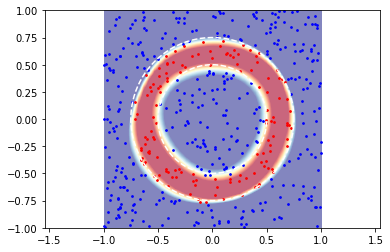

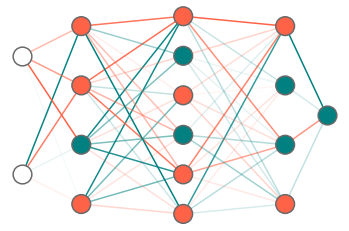

In [49]:
ep = []
c = []

### Iterations (no sub_iterations)
tau0 = 0.5
gamma = 10000
for epoch in range(1, Nepoch + 1):
    ## Computation of the descent direction
    # 0-initialization of the descent vectors
    
    # computation and summation over the data of their contributions to the total descent   
    for j in range (ndata) :
        NN.init_vector()
        k = (epoch*ndata + j)
        tau = (gamma*tau0)/(gamma + k)
        i = rd.randint(0, ndata-1)
        Desc_W, Desc_Bias = NN.descent(X=DATA.X[i], y=DATA.Y[i], pb=pb, tau=tau)
        #NN.add_to_vector(Desc_W, Desc_Bias)
    #NN.mult_vector(1/ndata)       # renormalization of the sum of descent vectors      
        # Update of the parameters
        #NN.add_vector_to_coefs()
        NN.add_to_coefs(Desc_W, Desc_Bias)


#computation of the error (sum of test losses)
    if epoch%plot_period==0:
        cost = NN.total_loss_and_prediction(DATA=TEST, pb = pb)
        title = "Epoch: " + str(epoch) + ", Cost: " + str(cost)
        print(title)
        NN.show_pred()
        TEST.show_class(pred="yes")
        pb.show_border('w--')
        plt.show()
    else:
        cost  = NN.total_loss(DATA=TEST, pb=pb)
        title = "Epoch: " + str(epoch) + ", Cost: " + str(cost)
        print(title)
    c.append(cost)
    ep.append(epoch)
    
NN.show()

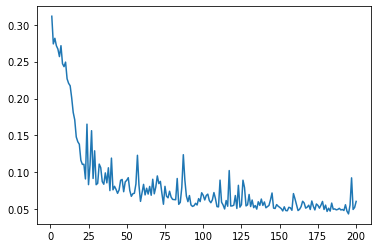

In [50]:
plt.plot(ep, c)
plt.show()

The full batch method is not efficient with the problem of the ring, probably because the areas of decision are not connected. The Stochastic gradient offers a good estimation but with a more important cost than with the square problem.